# Heart Attack Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(color_codes = True)

In [3]:
data = pd.read_csv("datasets/heart.csv")
o2_sat_data = pd.read_csv("datasets/o2Saturation.csv")

In [4]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Visualization

Text(0.5, 0, 'Age')

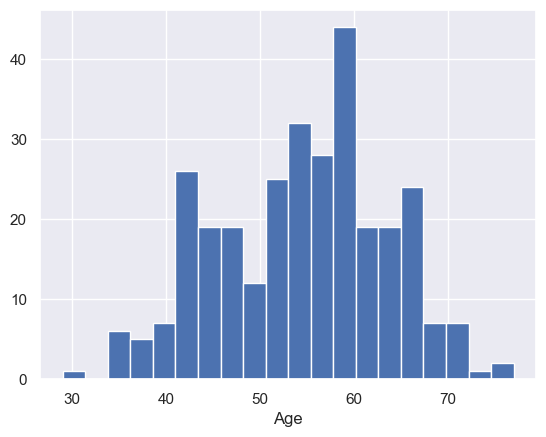

In [8]:
data["age"].hist(bins = 20)
plt.xlabel("Age")

C:\Users\91989\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 800x800 with 0 Axes>

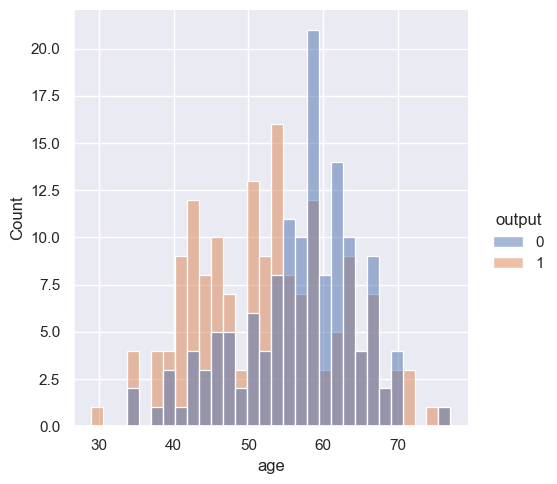

In [10]:
# same distribution but in seaborn
plt.figure(figsize = (8, 8))
sns.displot(x = "age", data = data, hue = "output", bins = 30, color = "BlGr")

C:\Users\91989\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91989\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91989\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91989\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

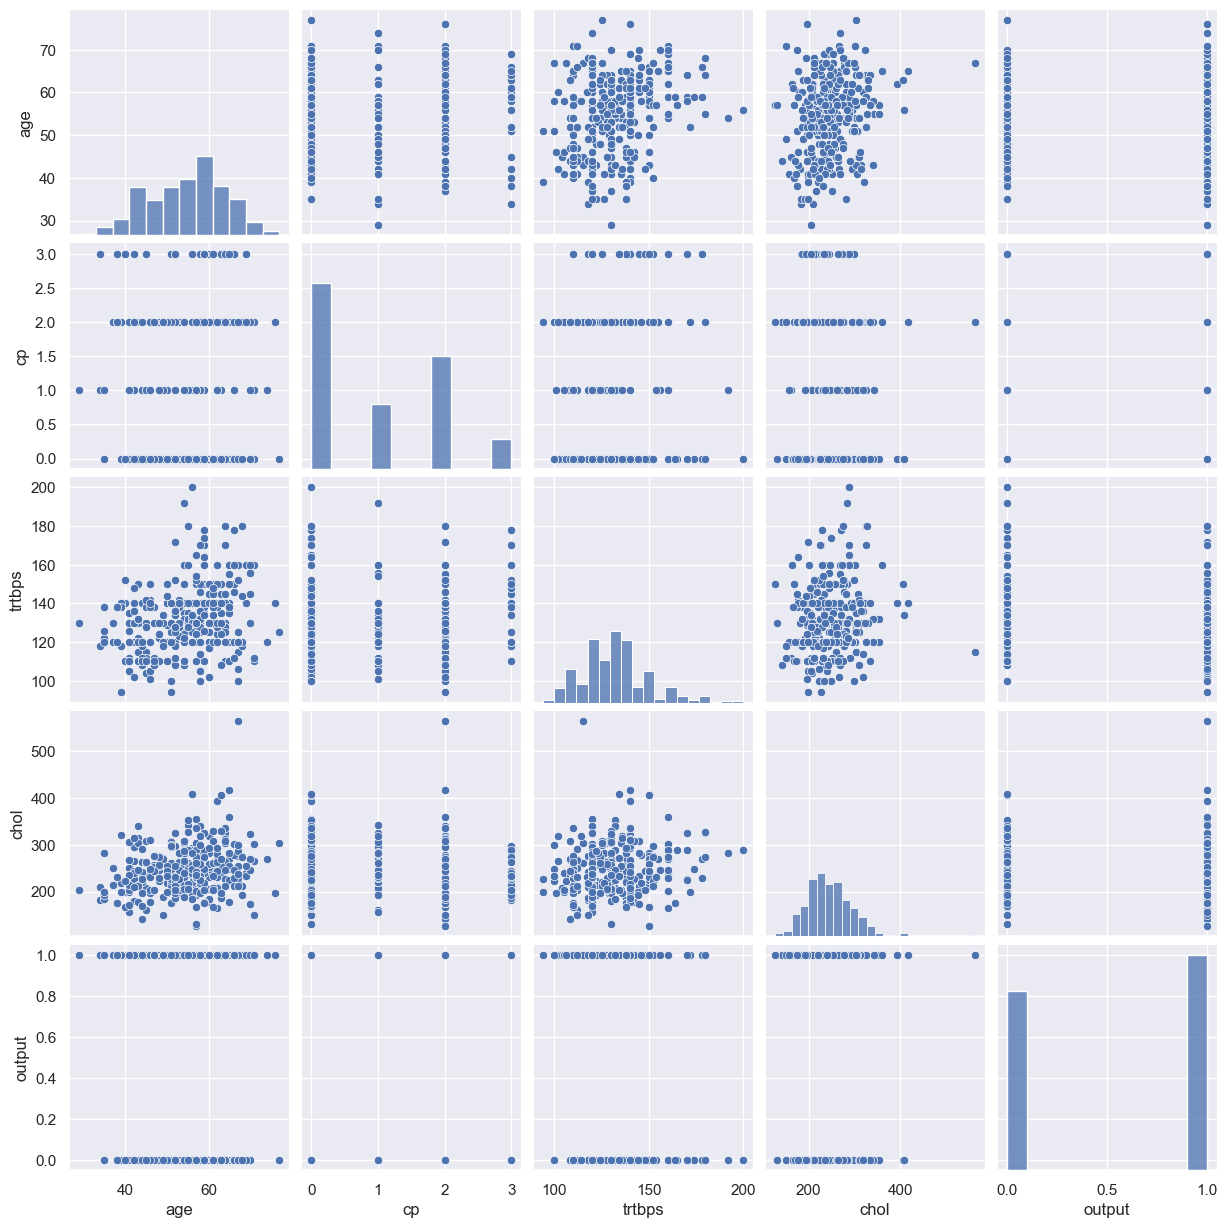

In [14]:
sns.pairplot(data[["age", "cp", "trtbps", 'chol', 'output']])

In [15]:
o2_sat_data.head()

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


In [16]:
data["o2Saturation"] = o2_sat_data["98.6"]
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2Saturation
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,98.6
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,98.1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,97.5


Text(0, 0.5, 'Thalach')

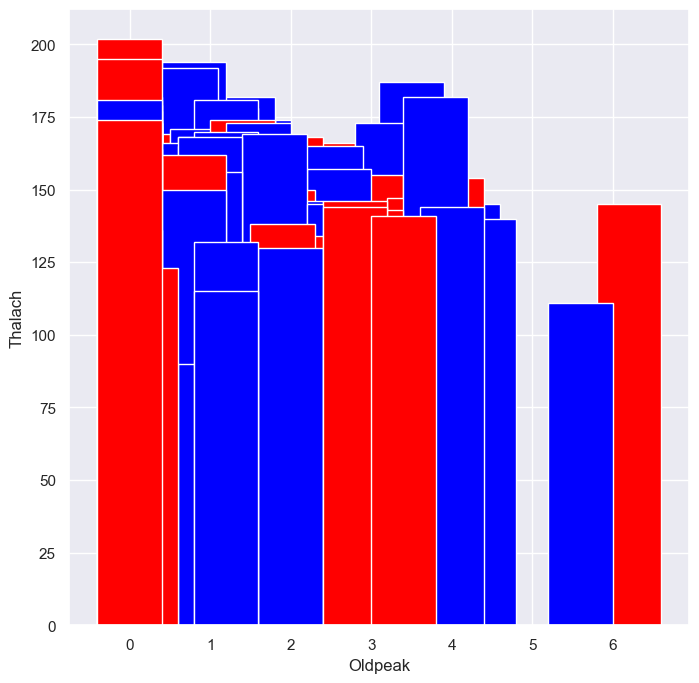

In [17]:
plt.figure(figsize = (8, 8))
plt.bar(data.oldpeak, data.thalachh, color = ["red", "blue"])
plt.xlabel("Oldpeak")
plt.ylabel("Thalach")

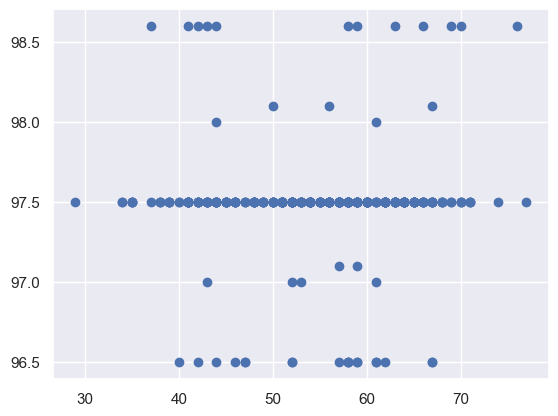

In [19]:
plt.scatter(data["age"], data["o2Saturation"])

In [20]:
corr = data.corr()
corr

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2Saturation
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439,0.019479
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937,-0.133972
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798,0.136100
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931,0.045749
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239,-0.030027
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046,-0.054655
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230,0.070147
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741,0.149697
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757,-0.081410
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696,0.017763


<Axes: >

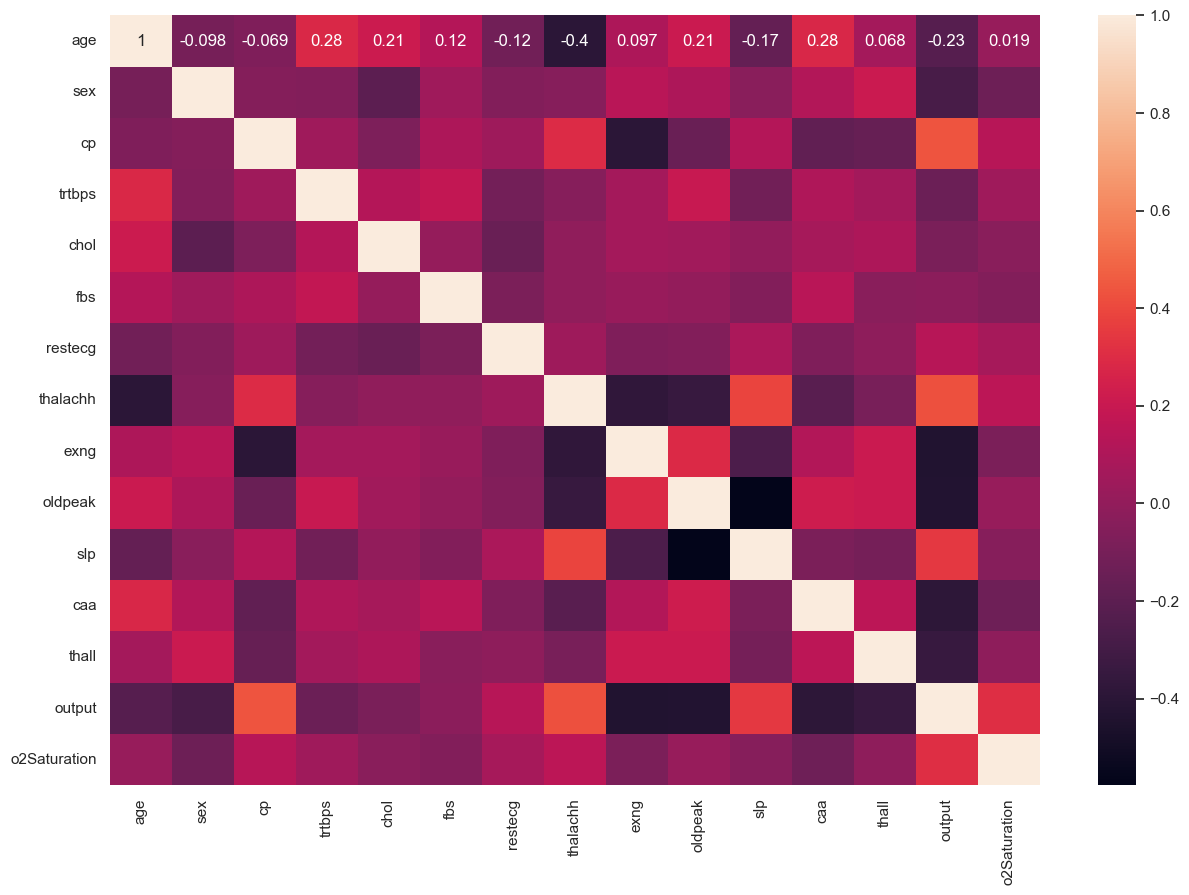

In [21]:
plt.figure(figsize = (15, 10))
sns.heatmap(corr, annot = True)

# Modelling

In [22]:
# Split the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop("output", axis = 1), data["output"], test_size = 0.3)

In [23]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((212, 14), (91, 14), (212,), (91,))

# Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
forest.score(x_test, y_test)

0.7912087912087912

Accuracy = 79.1%

In [23]:
forest_pred = forest.predict(x_test)
forest_pred

NameError: name 'forest' is not defined

[[29 13]
 [ 6 43]]


Text(0.5, 1.0, 'Confusion Matrix')

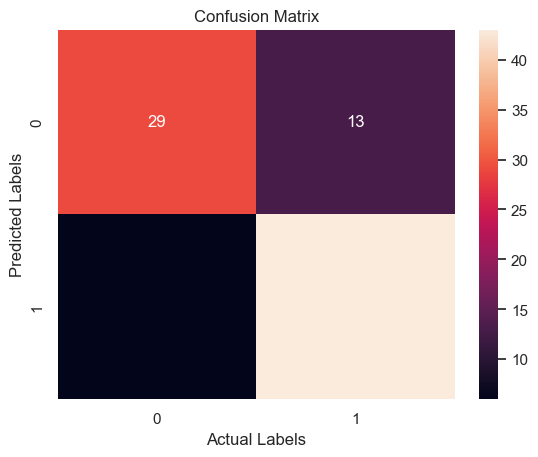

In [29]:
# Evaluate the prediced labels with the original labels
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, forest_pred))
sns.heatmap(confusion_matrix(y_test, forest_pred), annot = True)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix")

In [30]:
print(classification_report(y_test, forest_pred))

              precision    recall  f1-score   support

           0       0.83      0.69      0.75        42
           1       0.77      0.88      0.82        49

    accuracy                           0.79        91
   macro avg       0.80      0.78      0.79        91
weighted avg       0.80      0.79      0.79        91



# Using RandomizedSearchCV for hyperparameter turning
- RandomizedSearchCV is powerful technique for optimizing the hyperparameters of a machine learning model.
-  A model hyperparameter is a configuration that is external to the model and whose value cannot be estimated from data. They are often used in processes to help estimate model parameters.

In [31]:
from sklearn.model_selection import RandomizedSearchCV

estimator = RandomForestClassifier()
param_dists = {"n_estimators": [80, 90, 100, 110, 120],
               "max_depth": [5, 10, 15],
               "max_features": ["auto", "sqrt", "log2"],
               "min_samples_split": [2, 1, 3, 4],
               "min_samples_leaf": [1, 2, 3, 4]}

randomized_model = RandomizedSearchCV(estimator = estimator, param_distributions = param_dists, verbose = True, n_iter = 10, n_jobs = -1, cv = 5)

In [33]:
# Fit the model with our Randomized Model
randomized_model.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\91989\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\91989\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91989\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\91989\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\91989\anaconda3\Lib\site-package

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 1, 3, 4],
                                        'n_estimators': [80, 90, 100, 110,
                                                         120]},
                   verbose=True)

In [34]:
randomized_model.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [35]:
randomized_model.score(x_test, y_test)

0.7692307692307693

There is no improvement in the Random Forest Classifier Model.

# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter = 90)
log_reg.fit(x_train, y_train)
log_reg.score(x_test, y_test)

C:\Users\91989\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8351648351648352

In [37]:
log_reg_preds = log_reg.predict(x_test)
log_reg_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0], dtype=int64)

[[31 11]
 [ 4 45]]


Text(0.5, 1.0, 'Confusion Matrix')

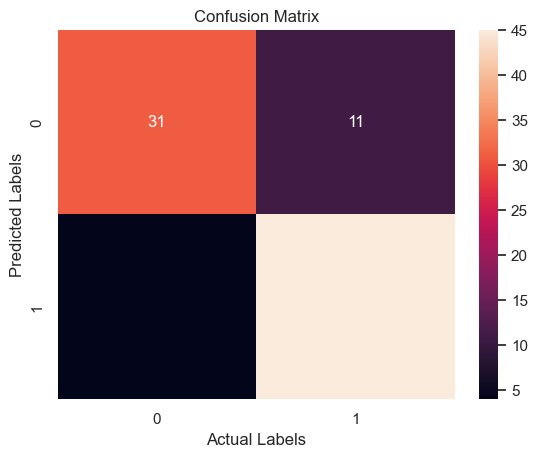

In [38]:
# Evaluate the prediced labels with the original labels
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, log_reg_preds))
sns.heatmap(confusion_matrix(y_test, log_reg_preds), annot = True)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix")

In [39]:
print(classification_report(y_test, log_reg_preds))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81        42
           1       0.80      0.92      0.86        49

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



# Let's see if our Logistic Regression Model improves using GridSearchCV

In [42]:
from sklearn.model_selection import GridSearchCV

estimator = LogisticRegression()
params_grid = {"penalty": ['l1', 'l2', 'elasticnet'],
               "multi_class": ['auto', 'ovr', 'multinomial'],
               "max_iter": [100, 120, 80],
               "solver": ['newton-cg', 'lbfgs', 'liblinear']}

grid_model = GridSearchCV(estimator = estimator, param_grid = params_grid, verbose = True, cv = 5, n_jobs = -1)
grid_model.fit(x_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


C:\Users\91989\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
255 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\91989\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91989\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\91989\anaconda3\Lib\site-packages\sklearn\linear_model\_

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [100, 120, 80],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=True)

In [43]:
grid_model.best_params_

{'max_iter': 80,
 'multi_class': 'multinomial',
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [44]:
grid_model.score(x_train, y_train)

0.910377358490566

There is improvement in the Logistic Regression Model using GridSearchCV

In [46]:
grid_preds = grid_model.predict(x_test)
grid_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0], dtype=int64)

[[31 11]
 [ 4 45]]


Text(0.5, 1.0, 'Confusion Matrix')

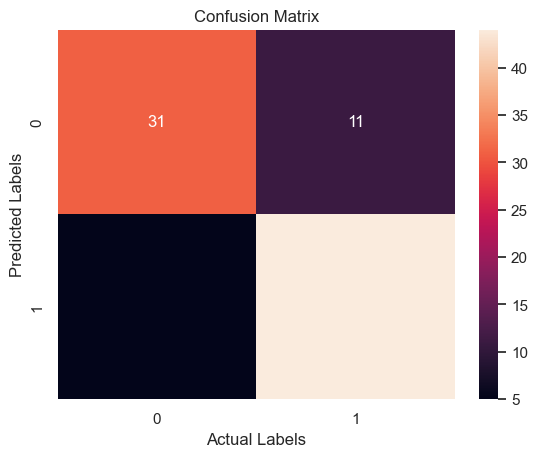

In [47]:
print(confusion_matrix(y_test, log_reg_preds))
sns.heatmap(confusion_matrix(y_test, grid_preds), annot = True)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix")

In [48]:
print(classification_report(y_test, grid_preds))

              precision    recall  f1-score   support

           0       0.86      0.74      0.79        42
           1       0.80      0.90      0.85        49

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



We have better predictions when we go with the Logistic Regression

# Decision Tree Classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
dtree.score(x_test, y_test)

0.7362637362637363

In [50]:
dtree_preds = dtree.predict(x_test)
dtree_preds

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1], dtype=int64)

[[31 11]
 [13 36]]


Text(0.5, 1.0, 'Confusion Matrix')

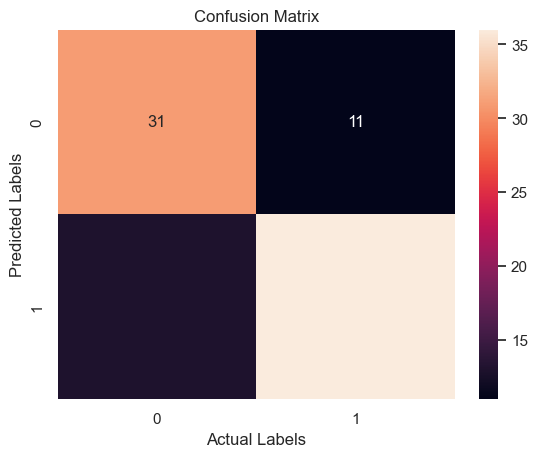

In [51]:
# Evaluate the prediced labels with the original labels
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, dtree_preds))
sns.heatmap(confusion_matrix(y_test, dtree_preds), annot = True)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix")

In [52]:
print(classification_report(y_test, dtree_preds))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72        42
           1       0.77      0.73      0.75        49

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.74      0.74      0.74        91



Decsion Tree Classifier is predicting the labels at the worst rate as compared to other two models.
Let's use StandardScaler method to scale the data and retrain the model, and check if we get better predictions or not.

In [11]:
import pandas as pd
data = pd.read_csv("datasets/heart.csv")
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop("output", axis = 1), data["output"], test_size = 0.3)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaler_train = scaler.fit_transform(x_train)
X_scaler_test = scaler.fit_transform(x_test)

In [14]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

# Now, fit the scaled data to the DecsionTreeClassifier

dtree.fit(X_scaler_train, y_train)
dtree.score(X_scaler_test, y_test)

0.8351648351648352

We can see that there is improvement using StandardScaler. 

In [15]:
scaler_preds = dtree.predict(X_scaler_test)
scaler_preds

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1], dtype=int64)

[[42  3]
 [21 25]]


C:\Users\91989\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Text(0.5, 1.0, 'Confusion Matrix')

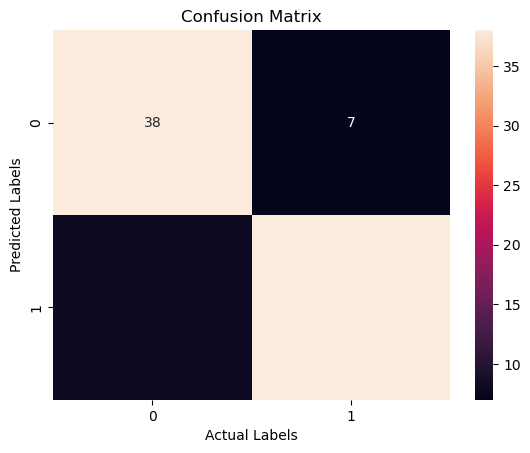

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

dtree_preds = dtree.predict(x_test)

print(confusion_matrix(y_test, dtree_preds))
sns.heatmap(confusion_matrix(y_test, scaler_preds), annot = True)

plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix")

In [21]:
print(classification_report(y_test, scaler_preds))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84        45
           1       0.84      0.83      0.84        46

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.84        91
weighted avg       0.84      0.84      0.84        91



In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

forest = RandomForestClassifier()
forest.fit(x_train, y_train)

estimator = RandomForestClassifier()
param_dists = {"n_estimators": [80, 90, 100, 110, 120],
               "max_depth": [5, 10, 15],
               "max_features": ["auto", "sqrt", "log2"],
               "min_samples_split": [2, 1, 3, 4],
               "min_samples_leaf": [1, 2, 3, 4]}
randomized_model = RandomizedSearchCV(estimator = estimator, param_distributions = param_dists, verbose = True, n_iter = 10, n_jobs = -1, cv = 5)
randomized_model.fit(x_train, y_train)

log_reg = LogisticRegression(max_iter = 90)
log_reg.fit(x_train, y_train)

estimator = LogisticRegression()
params_grid = {"penalty": ['l1', 'l2', 'elasticnet'],
               "multi_class": ['auto', 'ovr', 'multinomial'],
               "max_iter": [100, 120, 80],
               "solver": ['newton-cg', 'lbfgs', 'liblinear']}
grid_model = GridSearchCV(estimator = estimator, param_grid = params_grid, verbose = True, cv = 5, n_jobs = -1)
grid_model.fit(x_train, y_train)

dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
dtree.fit(X_scaler_train, y_train)


model_scores = {"Forest": forest.score(x_test, y_test),
                "Randomized Forest": randomized_model.score(x_test, y_test),
                "Logistic": log_reg.score(x_test, y_test),
                "Grid Logistic": grid_model.score(x_train, y_train),
                "Decision Tree": dtree.score(x_test, y_test),
                "Decision Tree Scaler": dtree.score(X_scaler_test, y_test)}

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\91989\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\91989\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91989\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\91989\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\91989\anaconda3\Lib\site-packages\

Fitting 5 folds for each of 81 candidates, totalling 405 fits


C:\Users\91989\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
255 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\91989\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91989\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\91989\anaconda3\Lib\site-packages\sklearn\linear_model\_

In [44]:
model_scores

{'Forest': 0.8131868131868132,
 'Randomized Forest': 0.8461538461538461,
 'Logistic': 0.8241758241758241,
 'Grid Logistic': 0.8537735849056604,
 'Decision Tree': 0.7362637362637363,
 'Decision Tree Scaler': 0.8461538461538461}

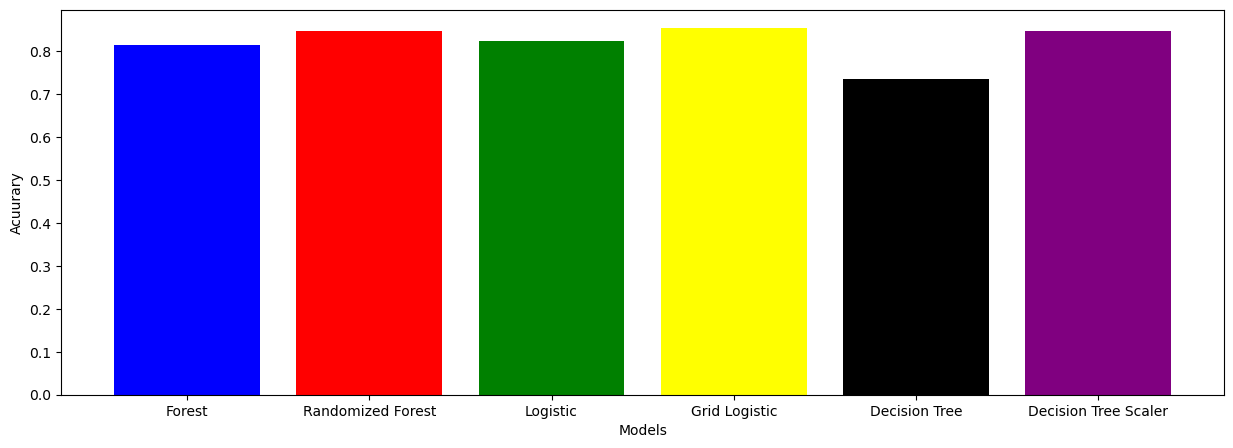

In [46]:
plt.figure(figsize = (15, 5))
plt.bar(*zip(*model_scores.items()), color = ["blue", "red", "green", "yellow", "black", "purple"])
plt.xlabel("Models");
plt.ylabel("Acuurary");

Randomized Forest Model and Grid Logistic Model provide the best predictions.